In [11]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data = pd.read_csv('at_risk_queer.csv', sep=',')
X = data.values[:, 0:(data.shape[1] - 2)]
Y = data.values[:, data.shape[1] - 1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = tree.DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

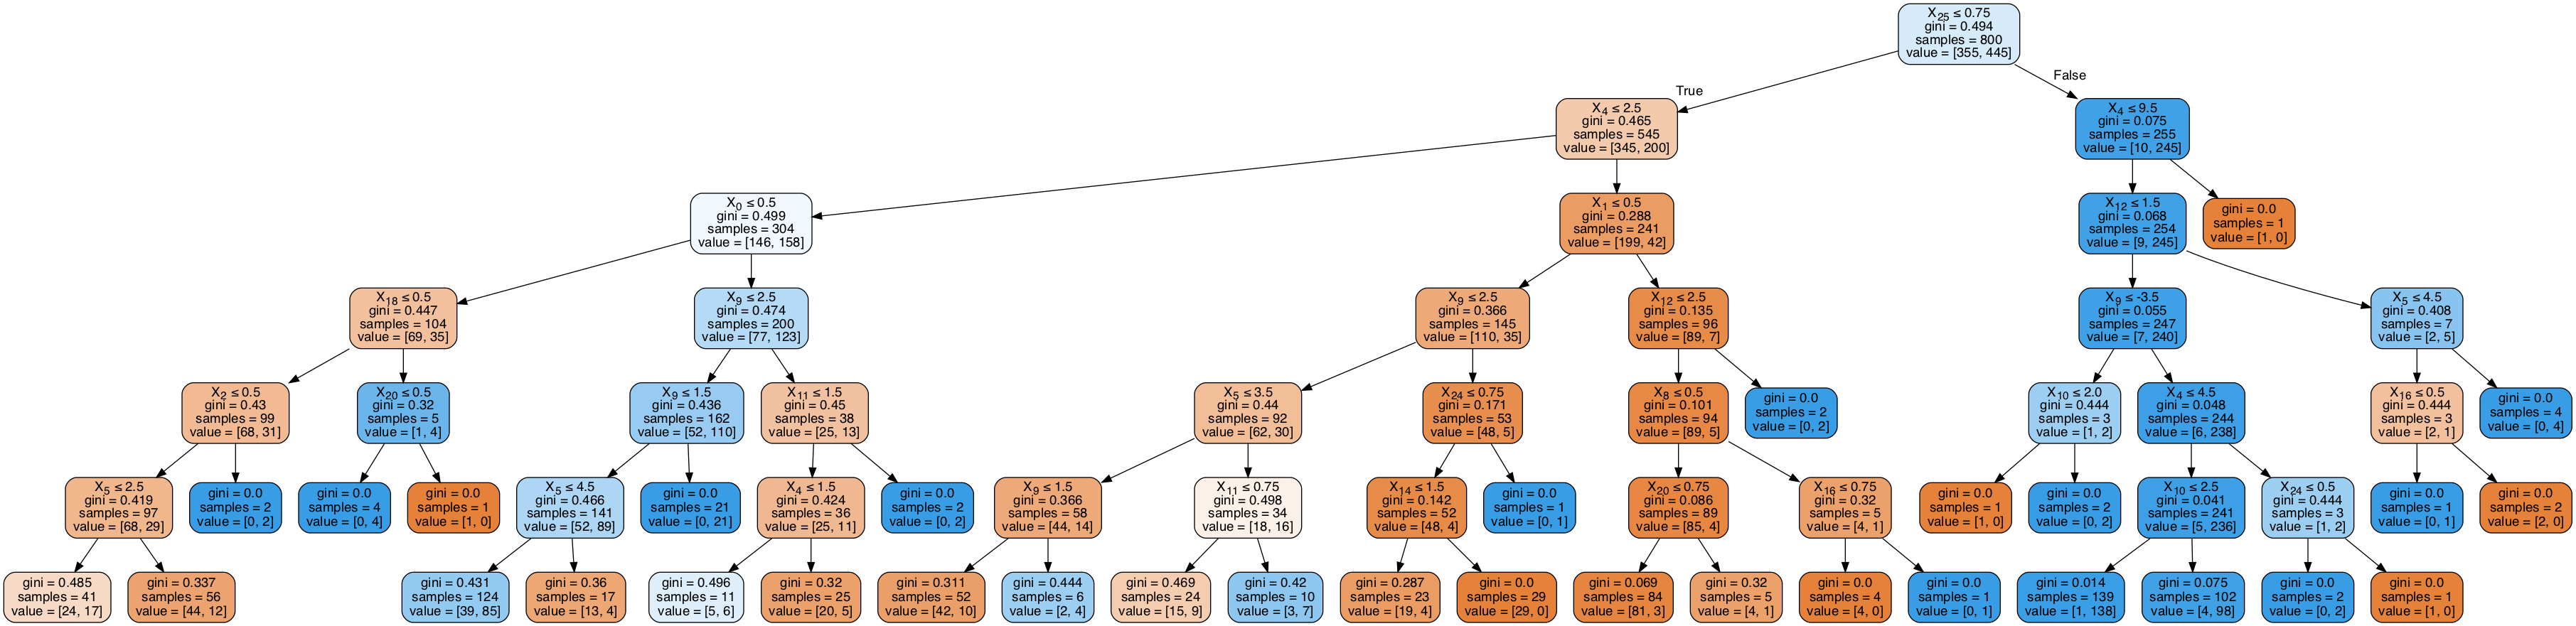

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
print("Accuracy on the train set: {:.3f}".format(clf.score(X_train, Y_train)))
print("Accuracy on the test set: {:.3f}".format(clf.score(X_test, Y_test)))

Accuracy on the train set: 0.851
Accuracy on the test set: 0.780
